# Week2_4 Assignment

## [BASIC](#Basic) 
- 커스텀 모듈(`helper.py`)에서 **클래스와 함수를 임포트**할 수 있다.
- **autograd**의 개념 복습


## [CHALLENGE](#Challenge)
- train() 함수에 **epoch, scheduler, grad_clipping**을 추가할 수 있다.
- **validate() 함수를 구현**할 수 있다.


## [ADVANCED](#Advanced)
- train() 함수를 사용해 데이터를 **4 epoch 학습**할 수 있다. 
- **predict 함수를 구현**할 수 있다. 
- **evaluation metric 구현**할 수 있다. 
    - accuracy



### Reference
- [Pytorch Autograd Explain official document](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

In [ ]:
import os
import sys
import pandas as pd
import numpy as np 
import torch
import random
!pip install transformers
# import help # help.py 저장 후 실행

In [ ]:
# set seed
seed = 7777
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 어제 자신이 구현한 helper.py 모듈 경로를 입력
sys.path.append('/content/drive/MyDrive/wanted_기타/help.py')

[help.py 따로 다운받기](https://drive.google.com/file/d/1W4_DtG6iRtz32Sj0X4FVO3OlXfhPdyRk/view?usp=sharing)

In [ ]:
# helper 모듈을 import하면 이전에 구현했던 다양한 함수 및 클래스를 사용할 수 있음 
# 함수: set_device()
# 함수: custom_collate_fn() 
# 클래스: CustomDataset
# 클래스: CustomClassifier
# 가 import 됨

from help import *
from torch.utils.data import RandomSampler, SequentialSampler

In [ ]:
# device
device = set_device()
print(f"device: {device}")

# available GPUs : 1
GPU name : Tesla P100-PCIE-16GB
device: cuda


## Basic

### 모듈에서 클래스와 함수를 임포트해 다음을 구현
- train_dataset, train_dataloader
- valid_dataset, valid_dataloader
- test_dataset, test_dataloader

In [ ]:
# train dataframe 다운로드
!wget https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/e56006adfac42f8a2975db0ebbe60eacbe1c6b11/data/sample_df.csv

--2022-03-03 09:01:56--  https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/e56006adfac42f8a2975db0ebbe60eacbe1c6b11/data/sample_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971625 (949K) [text/plain]
Saving to: ‘sample_df.csv.4’

sample_df.csv.4     100%[===================>] 948.85K  --.-KB/s    in 0.04s   

2022-03-03 09:01:56 (25.4 MB/s) - ‘sample_df.csv.4’ saved [971625/971625]



In [ ]:
# test dataframe 다운로드
!wget https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/main/data/sample_df_test.csv

--2022-03-03 09:01:56--  https://raw.githubusercontent.com/ChristinaROK/PreOnboarding_AI_assets/main/data/sample_df_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101383 (99K) [text/plain]
Saving to: ‘sample_df_test.csv.4’

sample_df_test.csv. 100%[===================>]  99.01K  --.-KB/s    in 0.009s  

2022-03-03 09:01:57 (10.9 MB/s) - ‘sample_df_test.csv.4’ saved [101383/101383]



In [ ]:
# 학습 & 평가 데이터셋 로드
# 학습 및 평가 샘플 데이터 개수는 각각 10,000개, 1,000개

df_train = pd.read_csv('sample_df.csv')
df_test = pd.read_csv('sample_df_test.csv')

print(f"train shape : {df_train.shape}")
print(f"test shape : {df_test.shape}")

train shape : (10000, 3)
test shape : (1000, 3)


In [ ]:
df_train.head()

,id,document,label
0,8525343,나 이거 더빙을 누가하는지 모르고 봤는데 왠지 더빙이 구리더라...더빙이 너무 별로였음.,0
1,4572888,현암이 소지섭이었으면 좋았겠는데..스토리각색도 좀 깔끔하게...,0
2,8504845,"ㅎㅎㅎ 대단하네 ㅜ,.ㅡ",0
3,5003367,이거보고 돈날린 기억이...........,0
4,3015049,한국영화 어쩌다 이지경까지 ㅠㅠ,0


In [ ]:
# Dataset 구현
# helper.py에 있는 CustomDataset 활용하여 train datset, test dataset 만들기

train_dataset = CustomDataset(list(df_train.document), list(df_train.label))
test_dataset = CustomDataset(list(df_test.document), list(df_test.label))

print(f"Train Dataset len: {len(train_dataset)}")
print(f"Train Dataset 1st element: {train_dataset[0]}")

print(f"Test Dataset len: {len(test_dataset)}")
print(f"Test Dataset 1st element: {test_dataset[0]}")


Train Dataset len: 10000
Train Dataset 1st element: ('나 이거 더빙을 누가하는지 모르고 봤는데 왠지 더빙이 구리더라...더빙이 너무 별로였음.', 0)
Test Dataset len: 1000
Test Dataset 1st element: ('신용문객잔 보고 후속편인줄 알고 봤더만 완전 개판이네 18.. 이련결 그냥 절에나 쳐 들어 가라.. 회오리에서 싸우는 신 참 가관이더라 .. 서극도 완전 쓰레기 감독이 다 됐구나.. 액션도 쓰레기고 배우들 연기도 참 가관이더라 18', 0)


In [ ]:
# Train Dataset을 학습과 검증 셋으로 분리
# 학습 셋과 검증 셋의 비율은 9:1
# torch.utils.data에서 제공되는 데이터 세트를 임의로 분할할 수 있는 함수 찾아서 사용
n_train_sample = df_train.shape[0]

n_train = int(n_train_sample*0.9)
n_valid = n_train_sample - n_train 
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [n_train, n_valid])

print(f"Train dataset len: {len(train_dataset)}")
print(f"Valid dataset len: {len(valid_dataset)}")

Train dataset len: 9000
Valid dataset len: 1000


In [ ]:
# DataLoader 구현
# train과 validation의 batch size는 각각 32, 64로 설정
# test의 batch size는 validation과 동일
# train에 사용할 DataLoader에서는 sampler로 RandomSampler 사용
# validation과 test에 사용할 DataLoader에서는 sampler로 SequentialSampler 사용
# 모든 DataLoader의 collate_fn은 helper.py에 있는 custom_collate_fn 사용
from torch.utils.data import DataLoader
train_batch_size = 32
valid_batch_size = 64

train_params = {'batch_size': train_batch_size,
          'sampler': RandomSampler(train_dataset),
          'collate_fn':custom_collate_fn
          }
valid_params = {'batch_size': valid_batch_size,
          'sampler': SequentialSampler(valid_dataset),
          'collate_fn':custom_collate_fn
          }
test_params = {'batch_size': valid_batch_size,
          'sampler': SequentialSampler(test_dataset),
          'collate_fn':custom_collate_fn
          }


train_dataloader = DataLoader(train_dataset,**train_params)

valid_dataloader = DataLoader(valid_dataset,**valid_params)

test_dataloader = DataLoader(test_dataset,**test_params)

print(f"Train dataloader # steps: {len(train_dataloader)}")
print(f"Valid dataloader # steps: {len(valid_dataloader)}")
print(f"Test dataloader # steps: {len(test_dataloader)}")

Train dataloader # steps: 282
Valid dataloader # steps: 16
Test dataloader # steps: 16


### `auto_grad` 개념 복습
- torch의 `auto_grad` 기능
    - pytorch는 `requires_grad` 파리미터의 값이 True인 텐서에 한해서 미분값을 자동으로 계산한다.
    - 미분값은 `loss.backward()` 가 호출될 때 자동으로 계산된다.

In [ ]:
# helper.py에 있는 CustomClassifier 모델을 로드해 model_freeze 변수에 instance를 생성
# hidden_size=768
# n_label=2
# freeze_base=True

model_freeze = CustomClassifier(768,2)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# from torchsummary import summary

# summary(model_freeze, (32,768))

## parameter 확인😀
- model.`parameters()`: parameter 담고있는 iterator
- model.`state_dict()`: \{name:state(param)\} 의 형태로 layer별 상태를 담고 있는 리스트. parameter와 유사하지만 name을 key로 갖고있고, `parameters()`에는 없는 running_mean, running_var 등의 값을 추가로 갖고 있음.
- model.`named_parameters()`: (name, param)의 tuple을 담고 있는 iterator

### 추가로..
+ summary를 import 해서 한눈에 확인 가능
+ parameter 당 requires_grad attribute로 grad값 True인지 확인 가능

In [ ]:
#@title
# for i, param in enumerate(model_freeze.parameters()):
#   if param.requires_grad:
#     print(i)
#     print(param.shape)
#     print(param)
#     if i==10: break;
#10개까지 layer 확인

In [ ]:
#@title
# # classifier 0의 weight 확인
# classifier_0_idx=list(model_freeze.state_dict().keys()).index('classifier.0.weight')
# classifier_0_idx

In [ ]:
#@title
# # model_freeze 모델의 모든 파라미터를 출력해보고 아래 질문에 답해 보자


# for i, (name, state) in enumerate(model_freeze.state_dict().items()):
    
#     if i==classifier_0_idx: #원하는 지점
#       print(i)
#       print(state.shape)
#       print(f"{name} \n-> params : {state}")

In [ ]:
#@title
# for i, param in enumerate(model_freeze.parameters()):
#   if i==classifier_0_idx-1:
#     print(i)
#     print(param.shape)
#     print(param)

#   # if i==10: break;

In [ ]:
#@title
# model_freeze.state_dict()['classifier.0.weight'].grad_fn

In [ ]:
for i, (name, param) in enumerate(model_freeze.named_parameters()):
    if name=='bert.encoder.layer.0.attention.self.query.weight':
      if param.requires_grad: # gradient True?
        print(i, name, param.data)
    if name=='classifier.0.weight':
       # gradient True?
      print(f'shape is : {param.shape}')
      if param.requires_grad:
        print('gradient not freezed.')
        
      print(f'gradient value is : {param.grad_fn}')

5 bert.encoder.layer.0.attention.self.query.weight tensor([[ 0.0136,  0.0162, -0.0616,  ..., -0.0227, -0.0551, -0.0385],
        [ 0.0549, -0.0462, -0.0229,  ...,  0.0028, -0.0088,  0.0135],
        [ 0.0275,  0.0846,  0.0093,  ..., -0.0018,  0.0184, -0.0297],
        ...,
        [ 0.0105, -0.0079, -0.0426,  ...,  0.0378, -0.0219,  0.0065],
        [-0.0283,  0.0635,  0.0240,  ...,  0.0183,  0.0244, -0.0108],
        [ 0.0601, -0.0081,  0.0419,  ...,  0.0085,  0.0259,  0.0199]])
shape is : torch.Size([32, 768])
gradient not freezed.
gradient value is : None


### `auto_grad` 개념 및 모델 구조 복습을 위해 다음 항목에 답해 보자
- `bert.encoder.layer.0.attention.self.query.weight` 텐서의 gradient는 True인 상태인가?
> Yes😆(5번index)
- `classifier.0.weight` 텐서의 shape은? 
> (32,768)
- `classifier.0.weight` 텐서는 freeze 상태인가 ? 
> gradient update가 될 준비가 되어있으므로 freeze 상태가 아니다.
- `classifier.0.weight` 텐서의 gradient 값은 무엇인가? 
> None(아직 없음)

### 위 모델 (`model_freeze`)의 모든 파라미터의 gradient를 freeze 해보자

In [ ]:
# 모든 파라미터의 gradient를 freeze 해보고 제대로 변경되었는지 확인하기 위해 모델의 모든 파라미터를 출력해보자.

for param in model_freeze.parameters():
    param.requires_grad = False
    print(param)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        -1.3442e-02,  6.0104e-03, -6.7578e-03,  6.5913e-03, -7.9478e-03,
        -1.0032e-02, -1.1815e-02, -7.9395e-03, -1.9843e-02, -1.3059e-02,
         5.7981e-03, -2.7387e-02, -7.6975e-03,  8.7198e-03, -1.8969e-02,
         3.7709e-04,  2.8882e-04,  1.4281e-02,  2.1960e-02, -6.7913e-03,
         1.7494e-02,  1.1266e-02,  4.3222e-03,  4.4129e-03, -2.2512e-02,
         1.7431e-02,  1.4737e-02,  3.2819e-03,  2.4844e-02, -3.8890e-03,
         1.5313e-02,  1.3542e-02, -6.9118e-03, -2.5436e-02, -2.0858e-02,
        -1.7866e-02, -6.2106e-03, -6.1865e-03,  1.0015e-02,  1.6644e-02,
         1.0408e-02, -8.4653e-03,  1.2620e-02, -4.5226e-03, -2.3275e-03,
        -7.4092e-03, -2.2515e-02, -2.2756e-02,  6.1284e-03, -1.2159e-03,
         1.6492e-02, -7.7661e-03, -1.7942e-02, -1.2137e-02,  1.2044e-04,
        -4.6123e-03, -6.5144e-03,  2.7131e-02, -2.3146e-02, -1.3522e-02,
         5.1533e-02,  3.6978e-02, -3.6630e-03, -8.1727e-03, -1.6725e-02,
         9.1355

## Challenge

### `scheduler` 를 생성 
- 스케쥴러를 알기 전에 먼저 `epoch`의 개념을 알아야 한다. Epoch는 dataset를 **몇 번 반복**해 학습할 것인지를 의미한다. 만약 dataset의 개수가 2,000개이고 epoch을 2번 학습하게 되면 총 4,000개의 데이터를 학습하게 된다.   
- 스케쥴러는 epoch에 따라 learning rate의 값을 조정하는 것을 의미한다. 
- 예를 들어 [여기](https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.get_linear_schedule_with_warmup)의 그림에서 볼 수 있듯이 `get_linear_schedule_with_warmup`는 특정 step까지는 learning rate를 천천히 상승시키다가 고점에 도달하면 다시 하락시킨다. 

### `model`, `optimizer`, `scheduler`를 초기화(=인스턴스 생성)하는 함수를 구현하라

In [ ]:
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from torch.nn.utils import clip_grad_norm_
from transformers import get_linear_schedule_with_warmup, get_constant_schedule

In [ ]:
# model:CustomClassifier 사용, hidden size는 768, label 개수는 2
# optimizer: AdamW 사용, learning rate는 2e-5
# scheduler: transformers.get_linear_schedule_with_warmup 함수 사용, 단, num_warmup_steps 매개 변수는 사용하지 않음

def initializer(train_dataloader, epochs=2):
    """
    모델, 옵티마이저, 스케쥴러를 초기화한 후 반환
    """
    
    model = CustomClassifier(768,2)

    optimizer = AdamW(
    model.parameters(),
    lr=2e-5,
    eps=1e-8
)
    
    total_steps = len(train_dataloader) * epochs
    print(f"Total train steps with {epochs} epochs: {total_steps}")

    scheduler = get_linear_schedule_with_warmup(optimizer=optimizer,
                                                num_warmup_steps=0, # num_warmup_steps 매개 변수는 사용하지 않음
                                                num_training_steps=total_steps )

    return model, optimizer, scheduler

### model, optimizer, scheduler의 파라미터 저장하는 함수를 구현하라

In [ ]:
# 모델 저장 함수 구현

def save_checkpoint(path, model, optimizer, scheduler, epoch, loss):
    file_name = f'{path}/model.ckpt.{epoch}'
    
    # torch.save 함수 참고
    torch.save(
        {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'loss' : loss
        }, 
        file_name
    )
    
    print(f"Saving epoch {epoch} checkpoint at {file_name}")

### `validate()` 함수 구현 
- `validate()` 함수 내 model의 상태는 **evaluate**이어야 한다. evaluate 상태의 model은 dropout을 진행하지 않는다. 
- **forward**를 진행할 때 `with torch.no_grad(): ...` 설정해 미분 계산을 방지한다.


In [ ]:
# input: model, valid_dataloader
# output: loss, 정확도
import torch.nn.functional as F

def validate(model, valid_dataloader):
    global loss_fct
   
    # 모델을 evaluate 모드로 설정 & device 할당
    model.eval()
    model.to(device)

    total_loss, total_acc= 0,0
        
    for step, batch in enumerate(valid_dataloader):
        
        # tensor 연산 전, 각 tensor에 device 할당
        batch = tuple(map(lambda item:item.to(device),batch))
            
        batch_input, batch_label = batch
            
        # gradient 계산하지 않고 forward 진행
        with torch.no_grad():
            logits = model(**batch_input)
            
        # loss
        loss = loss_fct(logits, batch_label)
        total_loss += loss.item()
        
        # accuracy
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1).flatten()
        acc = (preds == batch_label).cpu().numpy().mean()
        total_acc+=acc
    
    total_loss = total_loss/(step+1)
    total_acc = total_acc/(step+1)*100

    return total_loss, total_acc


### `train()` 함수에 `epoch`와 `clip_grad_norm` 추가
- data_loader를 `epoch`만큼 반복하면서 학습하도록 `train()` 함수를 수정하라
- `gradient cliping`은 미분 값 너무 큰 경우 gradient exploding되는 현상을 막기 위해 미분값이 `threshold`를 넘을 경우 특정 비율을 미분 값에 곱해 크기를 줄여준다.
- Reference
  - [clip_grad_norm_ official document](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html)
  - [그래디언트 클립핑 설명 한국어 블로그](https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-6/05-gradient-clipping)

In [ ]:
# 위에서 구현한 모델 저장 함수(save_checkpoint)와 validate 함수도 추가해보자

loss_fct = CrossEntropyLoss()

def train(model, train_dataloader, valid_dataloader=None, epochs=2):
        global scheduler, loss_fct
        
        # train_dataloaer 학습을 epochs만큼 반복
        for epoch in range(epochs):
            print(f"*****Epoch {epoch} Train Start*****")
            
            # 배치 단위 평균 loss와 총 평균 loss 계산하기위해 변수 생성
            total_loss, batch_loss, batch_count = 0,0,0
        
            # model을 train 모드로 설정 & device 할당
            model.train()
            model.to(device)
            
            # data iterator를 돌면서 하나씩 학습
            for step, batch in enumerate(train_dataloader):
                batch_count+=1
                
                # tensor 연산 전, 각 tensor에 device 할당
                batch = tuple(item.to(device) for item in batch)
            
                batch_input, batch_label = batch
            
                # batch마다 모델이 갖고 있는 기존 gradient를 초기화
                model.zero_grad()
            
                # forward
                logits = model(**batch_input)
            
                # loss
                loss = loss_fct(logits, batch_label)
                batch_loss += loss.item()
                total_loss += loss.item()
            
                # backward -> 파라미터의 미분(gradient)를 자동으로 계산
                loss.backward()
                
                # gradient clipping 적용 (max_norm = 1)
                torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm=1)
                
                # optimizer & scheduler 업데이트
                optimizer.step()
                scheduler.step()
                
                # 배치 10개씩 처리할 때마다 평균 loss와 lr를 출력
                if (step % 10 == 0 and step != 0):
                    learning_rate = optimizer.param_groups[0]['lr']
                    print(f"Epoch: {epoch}, Step : {step}, LR : {learning_rate}, Avg Loss : {batch_loss / batch_count:.4f}")

                    # reset 
                    batch_loss, batch_count = 0,0

            print(f"Epoch {epoch} Total Mean Loss : {total_loss/(step+1):.4f}")
            print(f"*****Epoch {epoch} Train Finish*****\n")
            
            if valid_dataloader is not None:
                print(f"*****Epoch {epoch} Valid Start*****")
                valid_loss, valid_acc = validate(model,valid_dataloader)
                print(f"Epoch {epoch} Valid Loss : {valid_loss:.4f} Valid Acc : {valid_acc:.2f}")
                print(f"*****Epoch {epoch} Valid Finish*****\n")
            
            # checkpoint 저장
            save_checkpoint('/content/drive/MyDrive/wanted_기타', model, optimizer, scheduler, epoch, loss)
                
        print("Train Completed. End Program.")

## Advanced

### 학습 데이터를 epoch 4까지 학습
- 매 epoch마다 다음을 수행한다.
  - 학습이 끝난 후 validate() 함수 실행 
  - validate() 함수가 끝난 후 model save 함수 실행

In [ ]:
# 4 epoch 학습
epochs=4
model, optimizer, scheduler = initializer(train_dataloader, epochs)
train(model, train_dataloader, valid_dataloader, epochs)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Total train steps with 4 epochs: 1128
*****Epoch 0 Train Start*****
Epoch: 0, Step : 10, LR : 1.9804964539007094e-05, Avg Loss : 0.6743
Epoch: 0, Step : 20, LR : 1.962765957446809e-05, Avg Loss : 0.6142
Epoch: 0, Step : 30, LR : 1.945035460992908e-05, Avg Loss : 0.5459
Epoch: 0, Step : 40, LR : 1.927304964539007e-05, Avg Loss : 0.5050
Epoch: 0, Step : 50, LR : 1.9095744680851064e-05, Avg Loss : 0.4320
Epoch: 0, Step : 60, LR : 1.891843971631206e-05, Avg Loss : 0.4622
Epoch: 0, Step : 70, LR : 1.8741134751773053e-05, Avg Loss : 0.4481
Epoch: 0, Step : 80, LR : 1.8563829787234043e-05, Avg Loss : 0.4203
Epoch: 0, Step : 90, LR : 1.8386524822695038e-05, Avg Loss : 0.3842
Epoch: 0, Step : 100, LR : 1.8209219858156032e-05, Avg Loss : 0.4062
Epoch: 0, Step : 110, LR : 1.8031914893617023e-05, Avg Loss : 0.4316
Epoch: 0, Step : 120, LR : 1.7854609929078013e-05, Avg Loss : 0.4261
Epoch: 0, Step : 130, LR : 1.7677304964539008e-05, Avg Loss : 0.4390
Epoch: 0, Step : 140, LR : 1.7500000000000002e-0

### 가장 dev acc 성능이 높았던 epoch의 모델의 체크 포인트를 불러와 로드하자
- 이것도 코딩으로 할 수 있을것 같은데 여기는 구현이 안되어있구나!
> 여기를 가보자.->
[save best model in pytorch](https://debuggercafe.com/saving-and-loading-the-best-model-in-pytorch/)

In [ ]:
# torch.load 함수 사용

checkpoint = torch.load('/content/drive/MyDrive/wanted_기타/model.ckpt.3',map_location=device)

In [ ]:
# checkpoint의 key 종류를 확인
checkpoint.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'loss'])

In [ ]:
checkpoint['epoch'], checkpoint['loss'], checkpoint['scheduler_state_dict']

(3,
 tensor(0.2625, device='cuda:0', requires_grad=True),
 {'_get_lr_called_within_step': False,
  '_last_lr': [0.0],
  '_step_count': 1129,
  'base_lrs': [2e-05],
  'last_epoch': 1128,
  'lr_lambdas': [None],
  'verbose': False})

In [ ]:
# 위에서 구현한 initializer 함수 사용하여 model, optimizer, scheduler 초기화

epochs=1
model, optimizer, scheduler = initializer(train_dataloader, epochs)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Total train steps with 1 epochs: 282


In [ ]:
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

### 모델 예측 함수 구현
- test_dataloader를 입력받아 모델이 예측한 확률값 (probs)과 실제 정답 (label) 을 출력하는 `predict()` 함수를 구현하자.
- 함수 정의
  - 입력 매개변수
    - `model` : `CustomClassifier` 모델. logits를 반환함 
    - `test_dataloader` : test 데이터셋의 텍스트와 레이블을 배치로 갖는 dataloader
  - 조건
    - `test_dataloader`는 이터레이터기 때문에 이터레이터를 순회하면서 `all_logits` 리스트에 배치 단위의 logits를 저장하고 `all_labels` 리스트에 배치 단위의 레이블 (0 또는 1 값)을 저장하라
  - 반환값
    - `probs`
      - logits에 softmax 함수를 취한 확률값. (test data 개수, label 개수) shape을 가짐. np.array 타입으로 데이터 타입을 변환할 것.
    - `labels`
      - 0 또는 1 값을 갖는 np.array. (test data 개수,) shape을 가짐.

In [ ]:
def predict(model, test_dataloader):
    """
    test_dataloader의 label별 확률값과 실제 label 값을 반환
    """

    # model을 eval 모드로 설정 & device 할당
    model.eval()
    model.to(device)

    all_logits = []
    all_labels = []

    for step, batch in enumerate(test_dataloader):

        # batch_input을 device 할당
        batch_input=tuple(map(lambda item: item.to(device),batch))

        batch_input, batch_label = batch
        
        # gradient 계산하지 않고 forward 진행
        with torch.no_grad():
          logits = model(**batch_input)

        # model에 batch_input을 넣어 logit 반환 & all_logits, all_labels 리스트에 값 추가 
  
        all_logits.append(logits)
        all_labels.append(batch_label)
    
    # print(all_logits[0].shape)
    # print(all_labels[0].shape)

    probs = list(map(lambda logit: torch.nn.Softmax(dim=1)(logit),all_logits)) # logits을 확률값으로 변환 & Tensor 타입을 numpy.array 타입으로 변환
    probs= torch.cat(probs,0) #batch 모두 잇기
    probs= probs.detach().cpu().numpy() # numpy로 변환
    
    all_labels = torch.cat(all_labels,0) #batch 모두 잇기
    all_labels = all_labels.detach().cpu().numpy() #  Tensor 타입을 numpy.array 타입으로 변환

    print(probs.shape, all_labels.shape)
    return probs, all_labels


- 모델이 예측한 확률값과 실제 label을 입력 받아 정확도를 출력하는 **accuracy()** 함수를 구현하자. 
- 함수 정의 
  - 입력 매개변수 
    - `probs` : `predict()` 함수의 반환값. 2차원의 np.array
    - `labels` : `predict()` 함수의 반환값. 1차원의 np.array
  - 조건
    - `probs`의 확률값이 0.5 이상이면 1, 이하이면 0이 되도록 만든다. 모델이 예측한 레이블을 실제값(`labels`)과 비교해 예측값과 실제값이 같으면 1, 다르면 0 점수를 준다. 모든 데이터에 대해 점수의 평균값이 accuracy 값이다. 
  - 반환값 
    - `acc` : 정확도 (Float type)

In [ ]:
probs, labels = predict(model, test_dataloader)

(1000, 2) (1000,)


In [ ]:
# accuracy 함수 구현
def accuracy(probs, labels):
    probs[probs>=0.5]=1
    probs[probs<0.5]=0
    y_pred = (probs)[:,1] # probs(확률값)을 label로 변경(0.5 이상이면 1, 0.5 미만이면 0)
    # print(y_pred)
    acc = np.mean(np.ones(labels.shape)-abs(y_pred-labels)) # 정확도 계산
    return acc 

In [ ]:
accuracy(probs, labels)

0.864

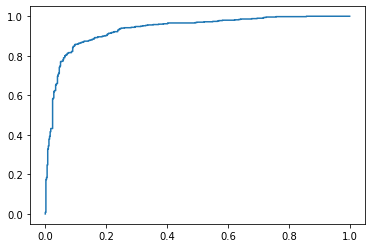

In [ ]:
import matplotlib.pyplot as plt
# ROC curve 보기
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(labels,probs[:,1])
plt.plot(fpr, tpr)

### `sklearn.metrics`의 `accuracy_score`, `roc_auc_score` 함수를 이용해 정확도와 auc를 계산하라

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [ ]:
# 정확도 출력
accuracy_score(labels,probs[:,1])


0.864

In [ ]:
# auc 출력
roc_auc_score(labels,probs[:,1])

0.864

## 회고🧐 :
- randomsampler 및 sequentialsampler 를 각각 trainset과 valset에 썼는데 그 이유를 생각해 보자.
- batch size가 32,64 인 이유?
- model의 layer와 그에 따른 parameter를 자유자재로 확인할 수 있는 능력을 갖추자.
- checkpoint를 구현하고 모델을 저장하고 불러올 수 있게 하자.

- initializer의 구조?
- scheduler는 epoch별로 진행되어야 하지만 이번에는 그러지 않았다. 그게 어떤 영향이 있을까?
